In [5]:
import scipy.io as sio
import os
import numpy as np
data=sio.loadmat('./BCICIV_2a_gdf/BCICIV_2a_A01T.mat')
label=['']
for i in data:
    if i.find('C')!=-1:
     label.append(i);
del label[0]
del label[5]
del label[4]
del label[3]
#算出平均
N3=data['C3NAN'];
N4=data['C4NAN'];
Nz=data['CzNAN'];
name=label[0]
#處理每個個別平均
summ=0;
C3ave=np.zeros([288,2328],dtype=np.float);
C4ave=np.zeros([288,2328],dtype=np.float);
Czave=np.zeros([288,2328],dtype=np.float);
n=0;
for i in range(len(data['C3session'])):
    if i in N3:
        n=n+1;
        continue;
    else:
        C3ave[i][:]=data['C3session'][i][:];
for i in range(len(data['C4session'])):
    if i in N4:
        continue;
    else:
        C4ave[i][:]=data['C4session'][i][:];
for i in range(len(data['Czsession'])):
    if i in Nz:
        continue;
    else:
        Czave[i][:]=data['Czsession'][i][:];


   

    

    




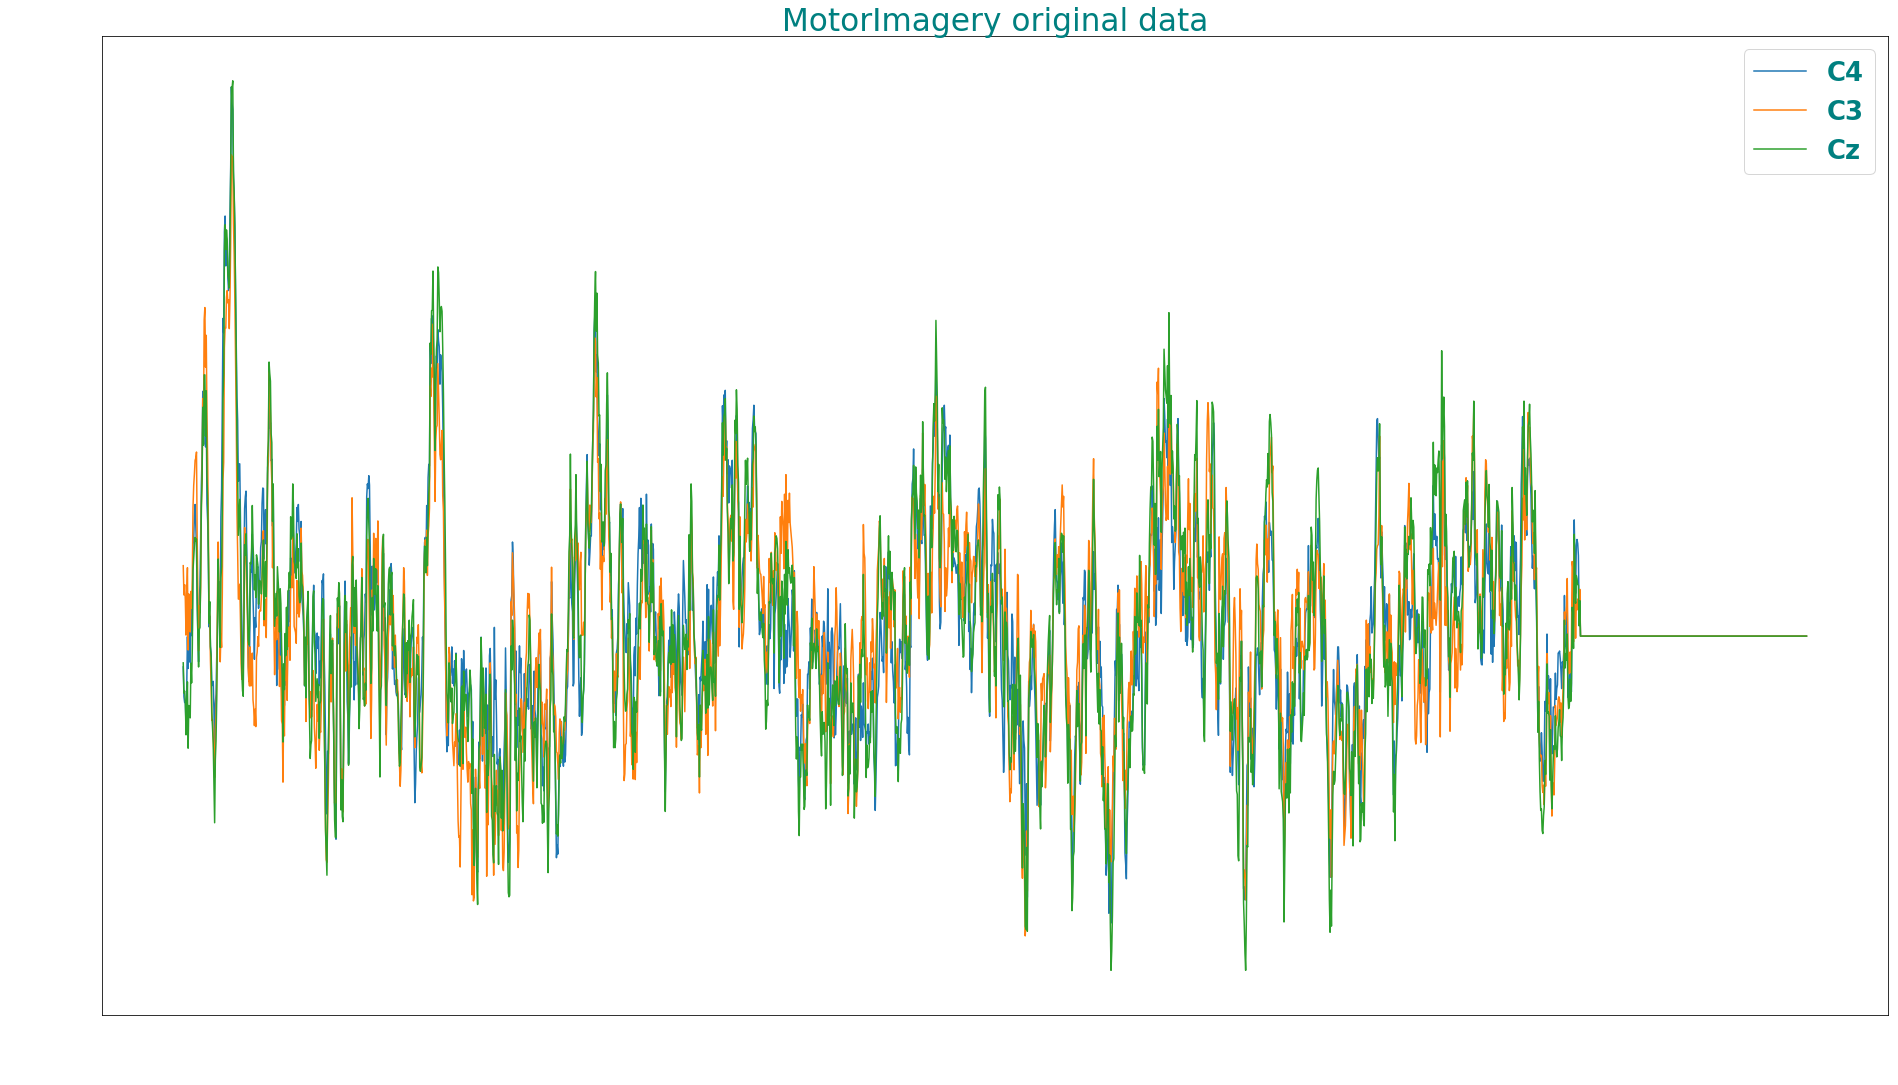

<Figure size 576x288 with 0 Axes>

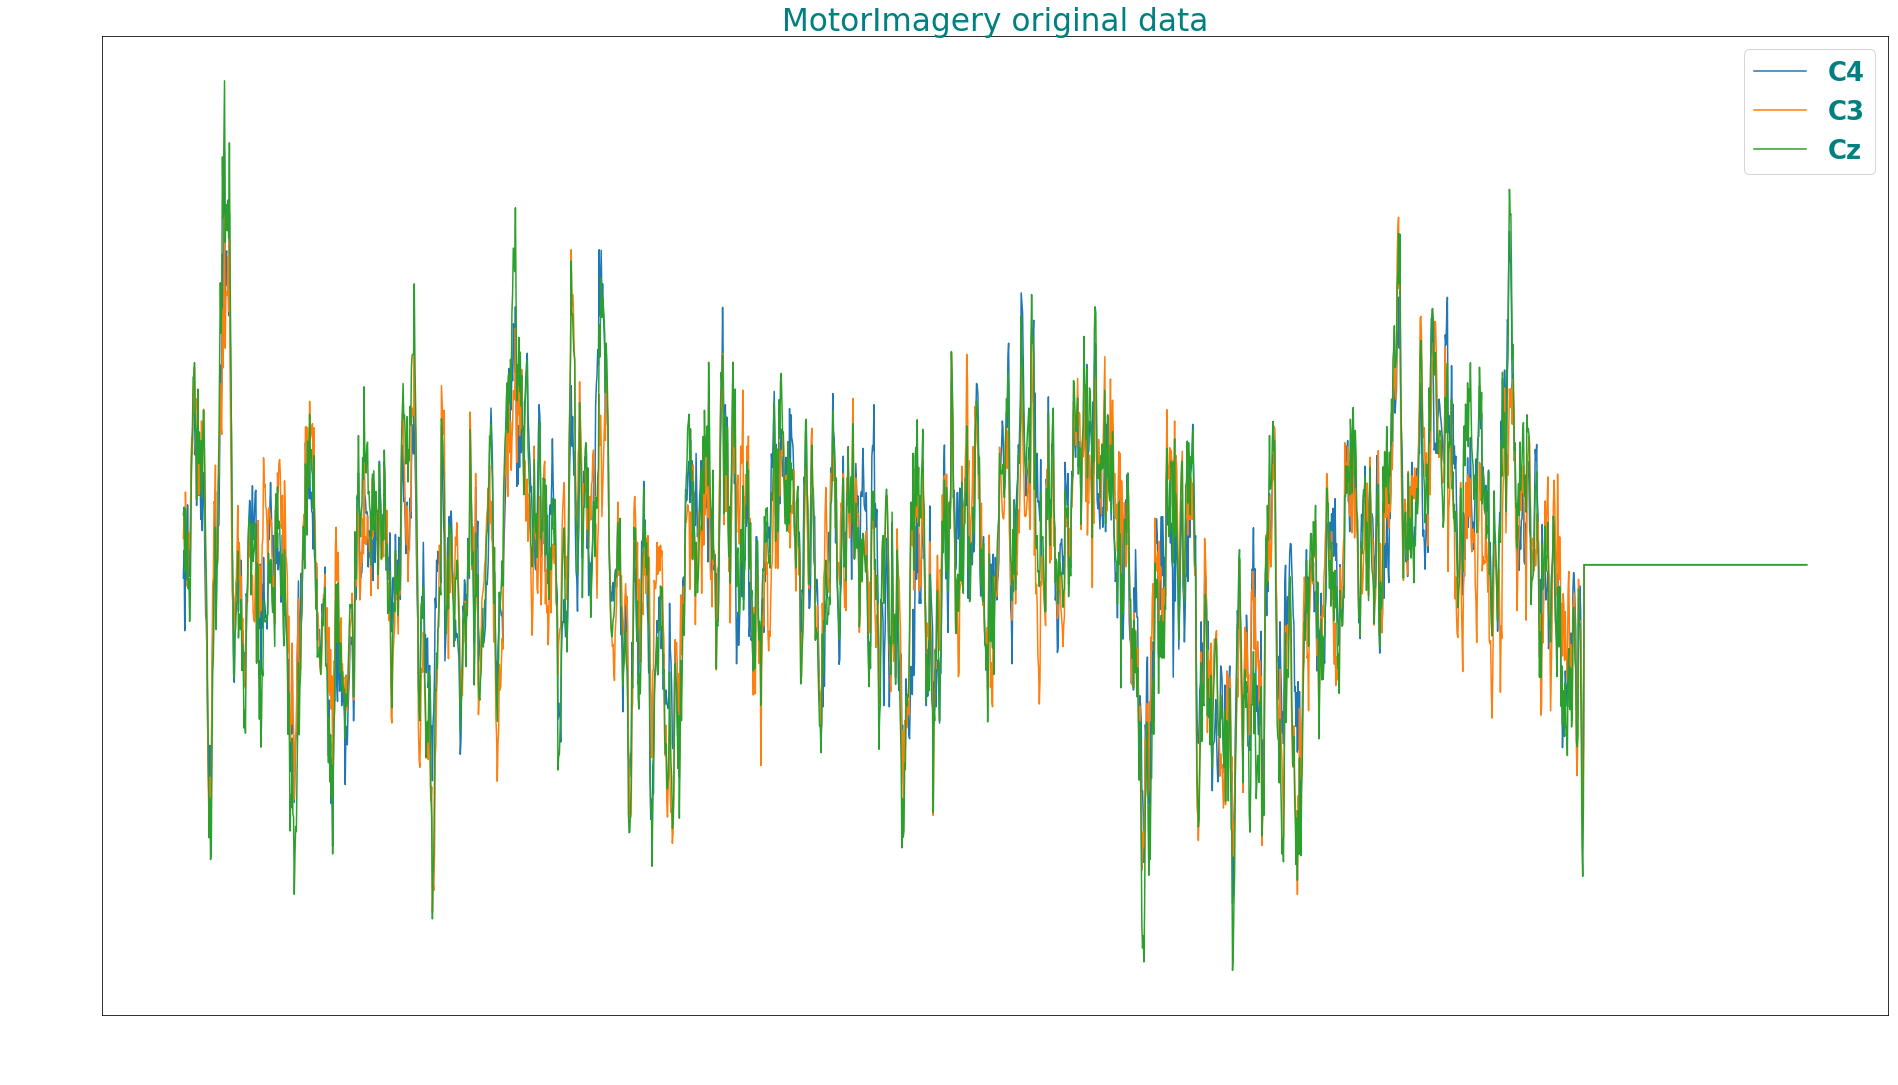

<Figure size 576x288 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
import numpy as np
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 26}
plt.rc('font', **font)
plt.rcParams["figure.figsize"] = [32,18]

plt.rcParams.update({'text.color' : "teal",
                     'axes.labelcolor' : "white",
                     'xtick.color' : "white",
                     'ytick.color' : "white"})

for i in range(2):
 for k in label:
        plt.plot(data[k][i])
        labels = ['C4', 'C3', 'Cz']
        plt.legend(labels, loc=1)
        plt.xlabel('t')
        plt.ylabel('Ampltitude')
        plt.title(f"MotorImagery original data")
 plt.figure(figsize=(8, 4))
 plt.show()

    
# 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4'



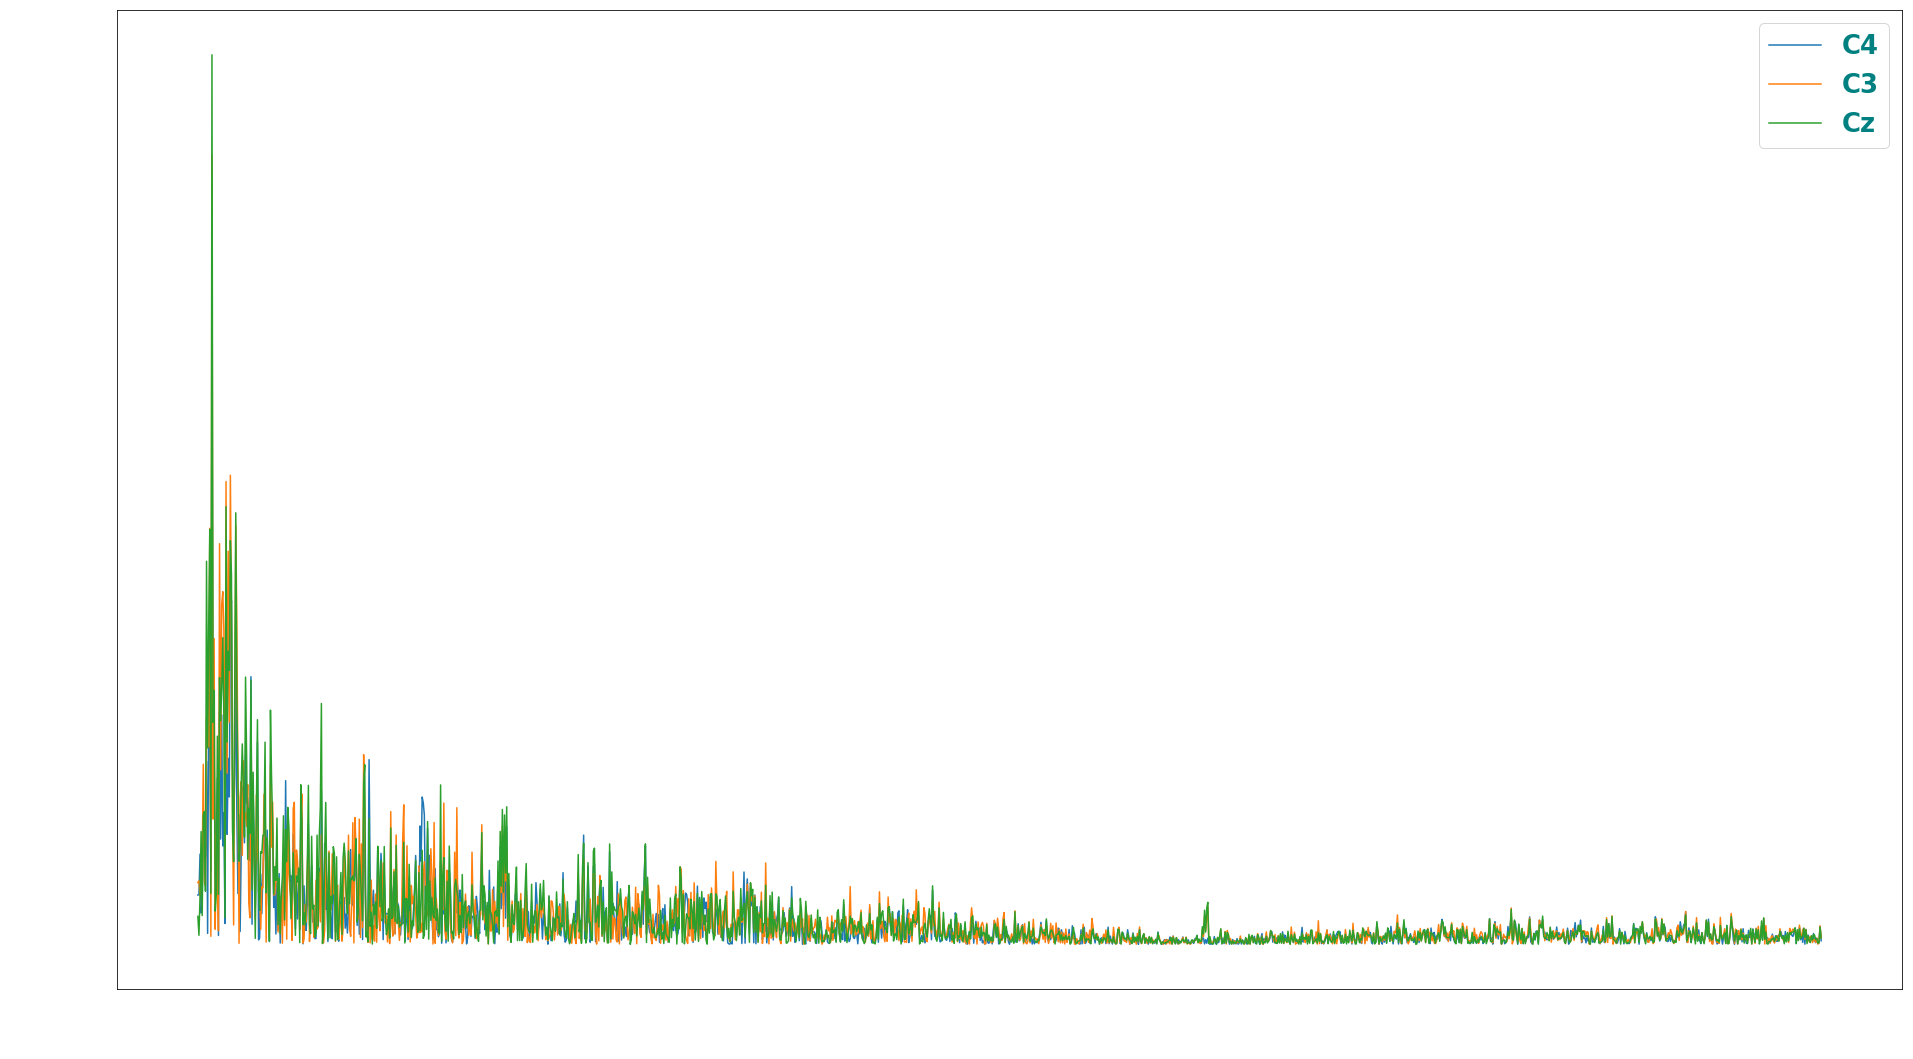

In [7]:
from scipy.fftpack import rfft

f_s = 250 # Sampling Rate(原始檔案是160但超過就不會失真)sampling_rate, fft_size，分别表示數字信號的取樣頻率和FFT的長度
T = 1 / f_s

C3fft=rfft(data['C3session'])
C4fft=rfft(data['C4session'])
Czfft=rfft(data['Czsession'])
labelc=[C3fft,C4fft,Czfft]
C3ffta = np.absolute(C3fft)
C4ffta = np.absolute(C4fft)
Czffta = np.absolute(Czfft)
labelabs=[C3ffta,C4ffta,Czffta]
def spectrum(i,N):
 r=0;
 xf=[[]for i in range(3)]
 x=[[]for i in range(3)]
 yf=[[]for i in range(3)]
 for k in range(len(labelabs)):
        
        x[r]= np.linspace(0, N*T, N-1)#linspace函数可以生成元素為50的等間隔數列。而前兩個参数分别是數列的開頭與结尾。如果寫入第三個參數，可以制定數列的元素個数
        xf[r] = np.linspace(0.0, 1.0/(2.0*T), N-1)#對稱性取一半的數列
        yf[r] = labelabs[k][i][0:N-1]
        plt.plot(xf[r], abs(yf[r][0:N-1]))
        labels = ['C4', 'C3','Cz']
        plt.legend(labels, loc=1)
        plt.xlabel('Frequency')
        plt.ylabel(r'Spectral Amplitude')
        r=r+1
 plt.show()
 return yf,x,xf
spec,time,freqs=spectrum(73,1500)


power spectral density

<Figure size 576x288 with 0 Axes>

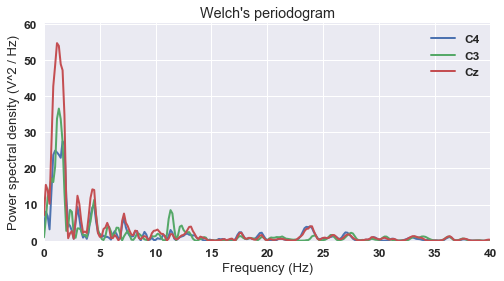

In [12]:
from scipy import signal
import seaborn as sns
import math

def psd(i):
    # Define window length (4 seconds)
    win = 2*f_s
    freqs=[[]for i in range(3)]
    pst=[[]for i in range(3)]
    plt.figure(figsize=(8, 4))
    r=0
    for k in label:
     freqs[r],pst[r] = signal.periodogram(data[k][i][0:1499], f_s, 'flattop', scaling='density')
     r=r+1
    return freqs,pst
    # Plot the power spectrum
def psddraw(freqs,pst,tit):
         i=0
         maxi=pst[i].max()
         sns.set(font_scale=1.2)
         plt.figure(figsize=(8, 4))
         plt.plot(freqs[i], pst[i],freqs[i+1], pst[i+1],freqs[i+2], pst[i+2],lw=2)
         labels = ['C4','C3','Cz'] 
         plt.legend(labels, loc=1)
         plt.xlabel('Frequency (Hz)')
         plt.ylabel('Power spectral density (V^2 / Hz)')
         if pst[i+1].max()>maxi:
                maxi=pst[i+1].max()
                if pst[i+2].max()>maxi:
                    maxi=pst[i+2].max()
         else:
            if pst[i+2].max()>maxi:
                    maxi=pst[i+2].max()
         plt.ylim([0, maxi * 1.1])
         plt.title(tit)
         plt.xlim([0, 40])   
         plt.show()
     
a=[[]for i in range(3)]
b=[[]for i in range(3)]
a,b=psd(146)
psddraw(a,b,"Welch's periodogram")

power spectral entrophy

In [11]:
def pse(freqs,d,title):
    
    win = 4 * f_s
    psdr=np.empty( (3, 251) )
    pse=np.empty( (3,251) )
    for r in range(3):
     h=0
     i=0
     sums=float(0.0)
     while h<len(d[r]):
      sums=sums+abs(d[r][h])
      h=h+1
     while i<len(d[r]):
      psdr[r][i]=abs(d[r][i])/sums
      pse[r][i]=psdr[r][i]*np.log(psdr[r][i])
      i=i+1
    plt.figure(figsize=(8, 4))
    labels = ['C4','C3','Cz'] 
    plt.plot(freqs[0],pse[0][:],freqs[1],pse[1][:],freqs[2],pse[2][:],lw=2)
    plt.legend(labels, loc=1)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power spectral entropy')
    plt.title(title)
    plt.xlim([0, 40])
    sns.despine()
freqs=[[]for i in range(3)]
d=[[]for i in range(3)]
freqs,d=psd(146)
pse(freqs,d,'Welch periodogram')

IndexError: index 251 is out of bounds for axis 0 with size 251

<Figure size 576x288 with 0 Axes>

Frequency Time Spectral deensity plot

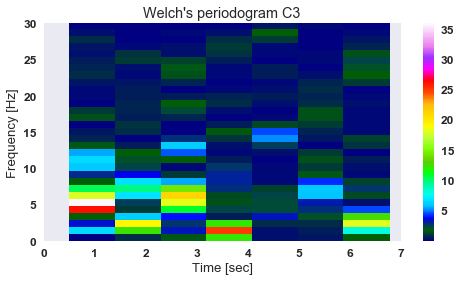

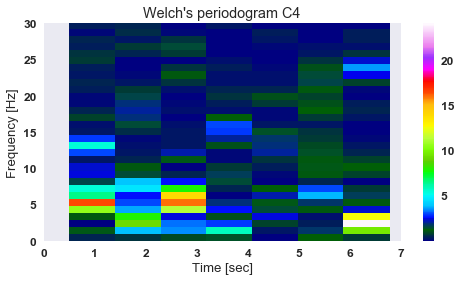

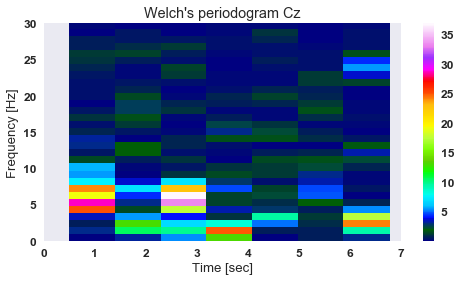

In [6]:
from pylab import *

#Compute and plot the spectrogram.
def Tsd(i):
 r=0
 for k in label:  
     labels = ['C3','C4','Cz']
     cm = plt.cm.gist_ncar
     plt.figure(figsize=(8, 4))
     freqs,t,Sxx= signal.spectrogram(data[k][i][0:2000],f_s, window=('blackmanharris'),scaling='density',mode='psd')
     plt.pcolormesh(t, freqs, Sxx,cmap=cm)
     plt.ylim([0,30])
     plt.xlim([0,7])
     plt.title("Welch's periodogram "+labels[r])
     plt.ylabel('Frequency [Hz]') 
     plt.xlabel('Time [sec]') 
     plt.colorbar()
     r=r+1
Tsd(1)

C:\Users\wu\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

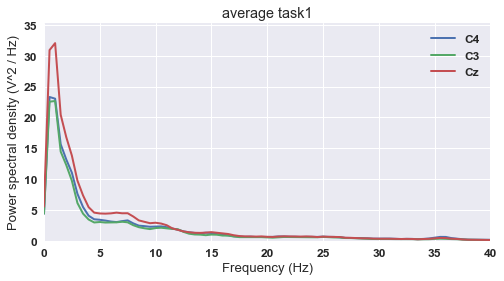

2


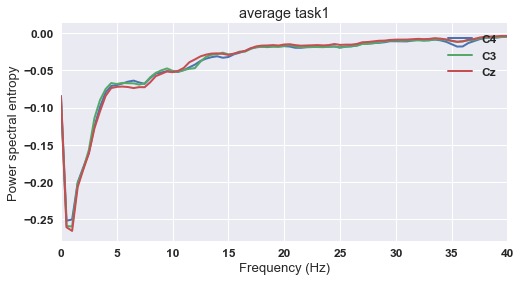

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

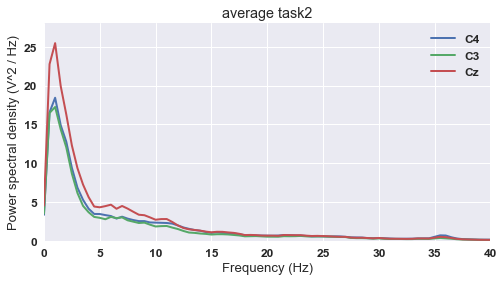

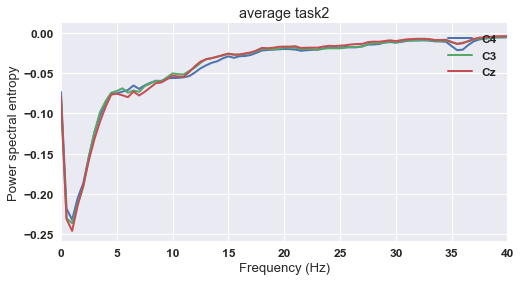

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

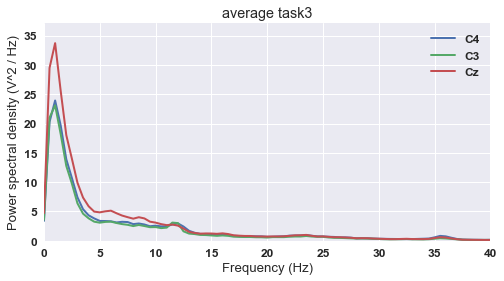

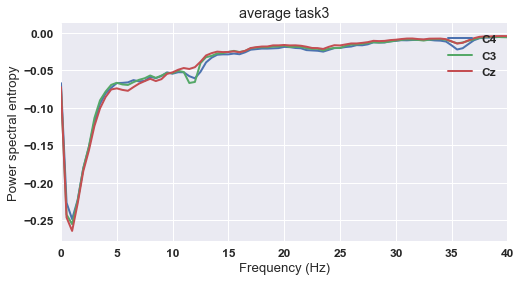

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

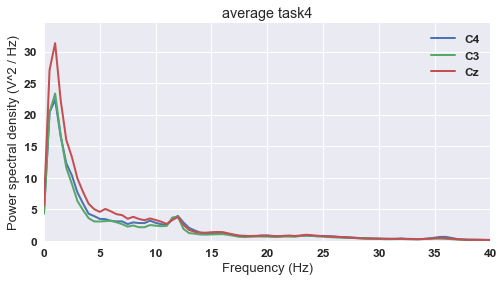

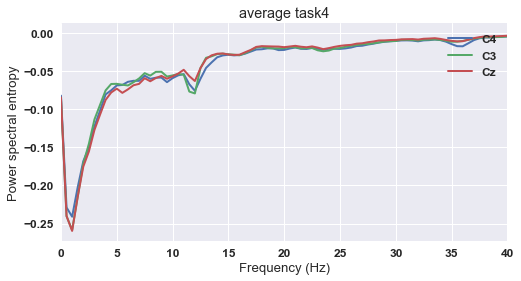

In [71]:
a=[[]for i in range(3)]
ar=[a for i in range(288)]
b=[[]for i in range(3)]
br=[b for i in range(288)]
count=0;
for i in range(0,72):
    if (i+1) in N3 or (i+1) in N4:
        count=count+1;
        continue;
    else:
       ar[i],br[i]=psd(i)
#task1C4,C3,Cz相加
C3sum=np.zeros(251,np.float);
C4sum=np.zeros(251,np.float);
Czsum=np.zeros(251,np.float);
for i in range(0,72):
  if (i+1) in N3 or (i+1) in N4:  
    continue;
  else:
   for k in range(251): 
    C3sum[k]=br[i][1][k]+C3sum[k];
    C4sum[k]=br[i][0][k]+C4sum[k];
    Czsum[k]=br[i][2][k]+Czsum[k];
C3sum=C3sum/(72-count);
C4sum=C4sum/(72-count);
Czsum=Czsum/(72-count);
x=[C4sum,C3sum,Czsum];
y=ar[8];
#C4,C3,Cz標準差
C3sig=np.zeros(251,np.float);
C4sig=np.zeros(251,np.float);
Czsig=np.zeros(251,np.float);
for i in range(0,72):
  if (i+1) in N3 or (i+1) in N4:  
    continue;
  else:
   for k in range(251): 
    C3sig[k]=(br[i][1][k]-C3sum[k])**2+C3sig[k];
    C4sig[k]=(br[i][0][k]-C4sum[k])**2+C4sig[k];
    Czsig[k]=(br[i][2][k]-Czsum[k])**2+Czsig[k];
C3sig=(C3sig/(72-count))**0.5;
C4sig=(C4sig/(72-count))**0.5;
Czsig=(Czsig/(72-count))**0.5;
k1=[C4sig,C3sig,Czsig]
psddraw(y,x,'average task1');
pse(y,x,'average task1');
#task2
count2=0;
for i in range(72,144):
    if (i+1) in N3 or (i+1) in N4:
        count2=count2+1;
        continue;
    else:
       ar[i],br[i]=psd(i)
print(count2)
#task2C4,C3,Cz相加
C3sum2=np.zeros(251,np.float);
C4sum2=np.zeros(251,np.float);
Czsum2=np.zeros(251,np.float);
for i in range(72,144):
  if (i+1) in N3 or (i+1) in N4:  
    continue;
  else:
   for k in range(251): 
    C3sum2[k]=br[i][1][k]/(72-count2)+C3sum2[k];
    C4sum2[k]=br[i][0][k]/(72-count2)+C4sum2[k];
    Czsum2[k]=br[i][2][k]/(72-count2)+Czsum2[k];
x1=[C4sum2,C3sum2,Czsum2];
y1=ar[8];
psddraw(y1,x1,'average task2');
pse(y1,x1,'average task2');
#C4,C3,Cz標準差
C3sig2=np.zeros(251,np.float);
C4sig2=np.zeros(251,np.float);
Czsig2=np.zeros(251,np.float);
for i in range(72,144):
  if (i+1) in N3 or (i+1) in N4:  
    continue;
  else:
   for k in range(251): 
    C3sig2[k]=(br[i][1][k]-C3sum2[k])**2+C3sig2[k];
    C4sig2[k]=(br[i][0][k]-C4sum2[k])**2+C4sig2[k];
    Czsig2[k]=(br[i][2][k]-Czsum2[k])**2+Czsig2[k];
C3sig2=(C3sig2/(72-count2))**0.5;
C4sig2=(C4sig2/(72-count2))**0.5;
Czsig2=(Czsig2/(72-count2))**0.5;
k2=[C4sig2,C3sig2,Czsig2]
#task3
count3=0;
for i in range(144,216):
    if (i+1) in N3 or (i+1) in N4:
        count3=count3+1;
        continue;
    else:
       ar[i],br[i]=psd(i)
#task3C4,C3,Cz相加
C3sum3=np.zeros(251,np.float);
C4sum3=np.zeros(251,np.float);
Czsum3=np.zeros(251,np.float);
for i in range(144,216):
  if (i+1) in N3 or (i+1) in N4:  
    continue;
  else:
   for k in range(251): 
    C3sum3[k]=br[i][1][k]+C3sum3[k];
    C4sum3[k]=br[i][0][k]+C4sum3[k];
    Czsum3[k]=br[i][2][k]+Czsum3[k];
C3sum3=C3sum3/(72-count3);
C4sum3=C4sum3/(72-count3);
Czsum3=Czsum3/(72-count3);
x2=[C4sum3,C3sum3,Czsum3];
y2=ar[8];
psddraw(y2,x2,'average task3');
pse(y2,x2,'average task3');
#C4,C3,Cz標準差
C3sig3=np.zeros(251,np.float);
C4sig3=np.zeros(251,np.float);
Czsig3=np.zeros(251,np.float);
for i in range(144,216):
  if (i+1) in N3 or (i+1) in N4:  
    continue;
  else:
   for k in range(251): 
    C3sig3[k]=(br[i][1][k]-C3sum3[k])**2+C3sig3[k];
    C4sig3[k]=(br[i][0][k]-C4sum3[k])**2+C4sig3[k];
    Czsig3[k]=(br[i][2][k]-Czsum3[k])**2+Czsig3[k];
C3sig3=(C3sig3/(72-count3))**0.5;
C4sig3=(C4sig3/(72-count3))**0.5;
Czsig3=(Czsig3/(72-count3))**0.5;
k3=[C4sig3,C3sig3,Czsig3]
#task4
count4=0;
for i in range(216,288):
    if (i+1) in N3 or (i+1) in N4:
        count4=count4+1;
        continue;
    else:
       ar[i],br[i]=psd(i)
#task4C4,C3,Cz相加
C3sum4=np.zeros(251,np.float);
C4sum4=np.zeros(251,np.float);
Czsum4=np.zeros(251,np.float);
for i in range(216,288):
  if (i+1) in N3 or (i+1) in N4:  
    continue;
  else:
   for k in range(251): 
    C3sum4[k]=br[i][1][k]+C3sum4[k];
    C4sum4[k]=br[i][0][k]+C4sum4[k];
    Czsum4[k]=br[i][2][k]+Czsum4[k];
C3sum4=C3sum4/(72-count4);
C4sum4=C4sum4/(72-count4);
Czsum4=Czsum4/(72-count4);
x3=[C4sum4,C3sum4,Czsum4];
y3=ar[8];
psddraw(y3,x3,'average task4');
pse(y3,x3,'average task4');
#C4,C3,Cz標準差
C3sig4=np.zeros(251,np.float);
C4sig4=np.zeros(251,np.float);
Czsig4=np.zeros(251,np.float);
for i in range(216,288):
  if (i+1) in N3 or (i+1) in N4:  
    continue;
  else:
   for k in range(251): 
    C3sig4[k]=(br[i][1][k]-C3sum4[k])**2+C3sig4[k];
    C4sig4[k]=(br[i][0][k]-C4sum4[k])**2+C4sig4[k];
    Czsig4[k]=(br[i][2][k]-Czsum4[k])**2+Czsig4[k];
C3sig4=(C3sig4/(72-count4))**0.5;
C4sig4=(C4sig4/(72-count4))**0.5;
Czsig4=(Czsig4/(72-count4))**0.5;
k4=[C4sig4,C3sig4,Czsig4]




In [72]:
#task1誤差

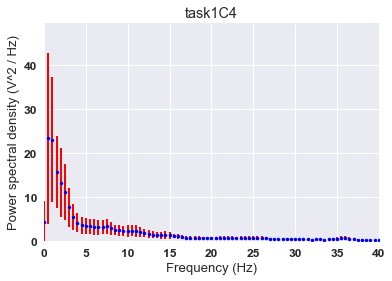

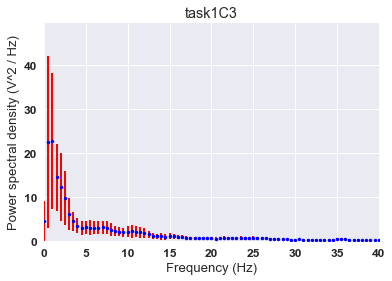

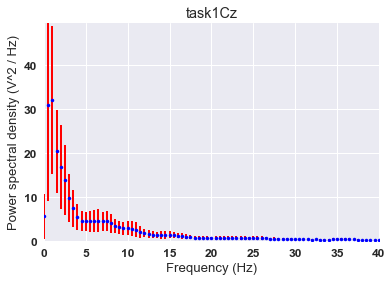

In [73]:
for i in range(3):
 tit=['task1C4','task1C3','task1Cz']
 plt.title(tit[i])
 plt.ylim([0, 45 * 1.1])
 plt.xlabel('Frequency (Hz)')
 plt.ylabel('Power spectral density (V^2 / Hz)')        
 plt.xlim([0, 40])   
 plt.errorbar(y[i],x[i],yerr=k1[i],fmt='.',ecolor='r',color='b',elinewidth=2,capsize=0.5)
 plt.show()

In [74]:
#task2誤差

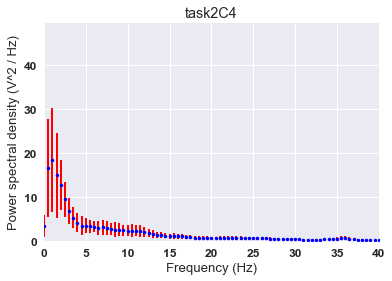

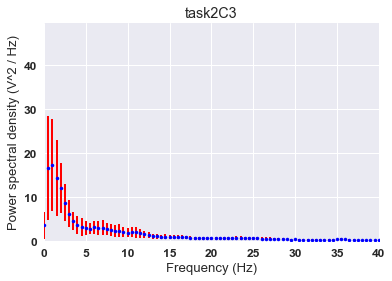

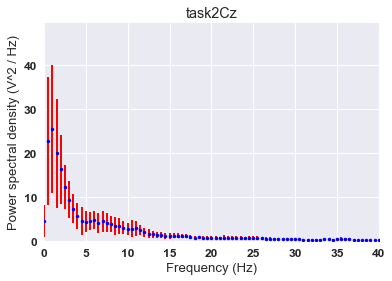

In [75]:
for i in range(3):
 tit=['task2C4','task2C3','task2Cz']
 plt.title(tit[i])
 plt.ylim([0, 45 * 1.1])
 plt.xlabel('Frequency (Hz)')
 plt.ylabel('Power spectral density (V^2 / Hz)')        
 plt.xlim([0, 40])   
 plt.errorbar(y1[i],x1[i],yerr=k2[i],fmt='.',ecolor='r',color='b',elinewidth=2,capsize=0.5)
 plt.show()

In [76]:
#task3誤差

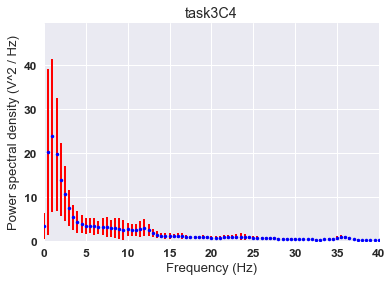

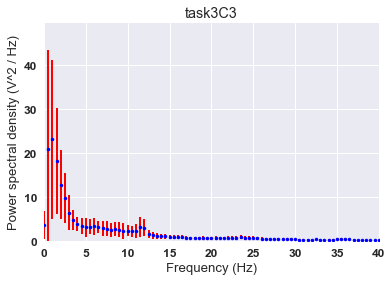

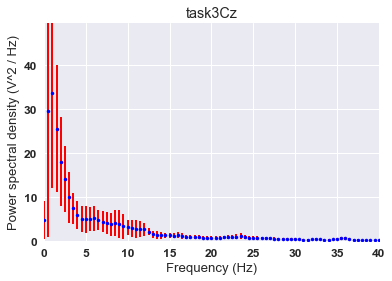

In [77]:
for i in range(3):
 tit=['task3C4','task3C3','task3Cz']
 plt.title(tit[i])
 plt.ylim([0, 45 * 1.1])
 plt.xlabel('Frequency (Hz)')
 plt.ylabel('Power spectral density (V^2 / Hz)')        
 plt.xlim([0, 40])   
 plt.errorbar(y2[i],x2[i],yerr=k3[i],fmt='.',ecolor='r',color='b',elinewidth=2,capsize=0.5)
 plt.show()

In [78]:
#task4誤差

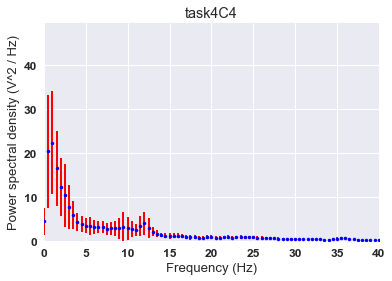

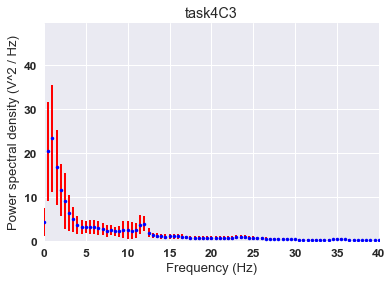

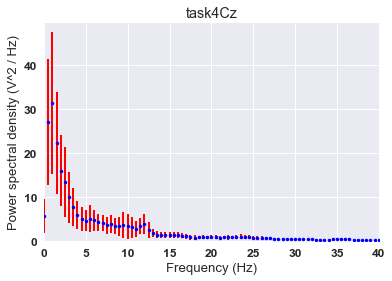

In [79]:
for i in range(3):
 tit=['task4C4','task4C3','task4Cz']
 plt.title(tit[i])
 plt.ylim([0, 45 * 1.1])
 plt.xlabel('Frequency (Hz)')
 plt.ylabel('Power spectral density (V^2 / Hz)')        
 plt.xlim([0, 40])   
 plt.errorbar(y3[i],x3[i],yerr=k4[i],fmt='.',ecolor='r',color='b',elinewidth=2,capsize=0.5)
 plt.show()